## IMSPM - IMmersed Solid-Phase Microextraction
Example

In [1]:
#First import numpy, since all arrays are based on numpy
import numpy as np 

#Import matplotlib, for plotting
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import the main software library
import simex_lib as simex

All parameters must be adopted in the same units of space/time/mass/volume
here we adopt:
- space units: centimeters (cm) 
- time units: seconds (s)
- mass: Micrograms (mug)
- volume: cubic-centimeters or milliliters (cm^3, mL)


In [4]:
#Experiment basename (for filenames and figures)
name = "imspme"

The first step is to set the domain, that is, the position of the interfaces and boundaries.

In [5]:
#Domain definition (position of interfaces) 
# x0   x1   x2  x3 
# |----|----|---|
#x=np.array([initial_position, interface_1, final_position])
x=np.array([0, 0.2, 0.25]) # cm 

Now we set the names of the compartments.

In [6]:
#Names of compartments
#xnames = ["", ""]
xnames = ["sample", "spme fiber"]

Set initial concentrations, constant in each compartment.

In [7]:
#Initial concentrations in each space
#  Assumed constant for each space
#   C0   C1    
# |----|----|
#C=np.array([C0, C1])   # (mug/mL)
C=np.array([1, 0.0]) # (mug/mL)

Diffusion coefficients for each compartment, constant at each one.

In [8]:
#Diffusion coefficients for each space
#   D0   D1    
# |----|----|
#D=np.array([D0, D1])           # (cm^2/s)
D=np.array([18e-6, 2.8e-6]) # (cm^2/s)

Set the partition coefficients. Always enforce zero at external boundaries for no flow condition.

In [9]:
#Partition coefficients K for each interface
# Set 0.0 for beggining and endpoints    
# K0  K1  K2
# |---|---|
#K=np.array([K0, K1, K2]) # 2 boundaries and 1 interface coefficient, non-dimensional
K=np.array([0.0, 0.1, 0.0])

Now configure runtime options for this simulation.

In [10]:
#Max time definition (how long to run the simulation)
maxtime = 14400 # seconds

#Time step size
dt = 0.1  # seconds - depending on your diffusion coefficients, this may be required to be small

#Plotting time spots (snapshots of the concentrations are saved in these time instants)
iplot_time=np.array([0.0, 600, 1800, 3600, 7200, 14400]) # seconds
#iplot_time=np.linspace(0, 50, 21, endpoint=True) #Equally spaced plots, for animations

#Space discretization (number of grid points) - depending on your device, this may need to be incresed
N = 500

We now build the device with these parameters (we have given the same names of the variables as the device function arguments, but we could have called the variables differently).

In [11]:
p = simex.device(
        D = D, 
        K = K, 
        C = C, 
        xspace = x, 
        xnames = xnames, 
        name = name, 
        N = N, dt = dt, maxtime = maxtime, iplot_time = iplot_time)


        --------------------------------------------------------------
        Simex - Simulation of Extraction Processes
        --------------------------------------------------------------
        
You defined a device with 2 compartment(s).
Mechanism layout/interfaces (x):  [0.   0.2  0.25]
Initial concentrations: [1. 0.]
Diffusion coefficients: [1.8e-05 2.8e-06]
Interface coefficients: [0.  0.1 0. ]
Output basename: output/imspme/imspme

Compartment 0  setup
 Name:                   sample
 Local Domain:           [0.  0.2]
 Difusion (neigbours):   [0.0e+00 1.8e-05 2.8e-06]
 Border/Interfaces Coef: [0.  0.1]

Compartment 1  setup
 Name:                   spme fiber
 Local Domain:           [0.2  0.25]
 Difusion (neigbours):   [1.8e-05 2.8e-06 0.0e+00]
 Border/Interfaces Coef: [0.1 0. ]

Proposed number of control volumes (grid points):  500
Adjusted number of grid points:  500
Number of degrees of freedom:  497


Time-space info (dx, dt, Nt, maxD, dx/maxD):
0.0005 0.1 144000 1.8



Now that the device structure is built, we can actually use in a few ways. 

Lets loop in time the model to see how the concentrations evolve in time. The main function here is run(), which calculates all time steps of an implicit solver for the model of the device. It will save and return snapshots at all time set in iplot_time.

In [12]:
concentrations = p.run()

 It:  0  Time:  0.0  Mass:  0.20215  %Dif Eq:  250.0000 %
 It:  6000  Time:  600.0  Mass:  0.20009  %Dif Eq:  153.1699 %
 It:  18000  Time:  1800.0  Mass:  0.19986  %Dif Eq:  31.7249 %
 It:  36000  Time:  3600.0  Mass:  0.19981  %Dif Eq:  2.8340 %
 It:  72000  Time:  7200.0  Mass:  0.19980  %Dif Eq:  0.1790 %
 It:  144000  Time:  14400.0  Mass:  0.19980  %Dif Eq:  0.1714 %
 
 Saving concentrations as 
  output/imspme/imspme_data.csv

 %Eq   Time 
50.0 %   1454.80
60.0 %   1624.20
70.0 %   1842.30
80.0 %   2149.10
90.0 %   2670.90
95.0 %   3186.40
99.0 %   4318.00
99.5 %   4742.10



The snapshots were saved in the csv files and also returned to the list of snapshots given at "concentrations". We can use this output to plot the concentrations, as follows. 

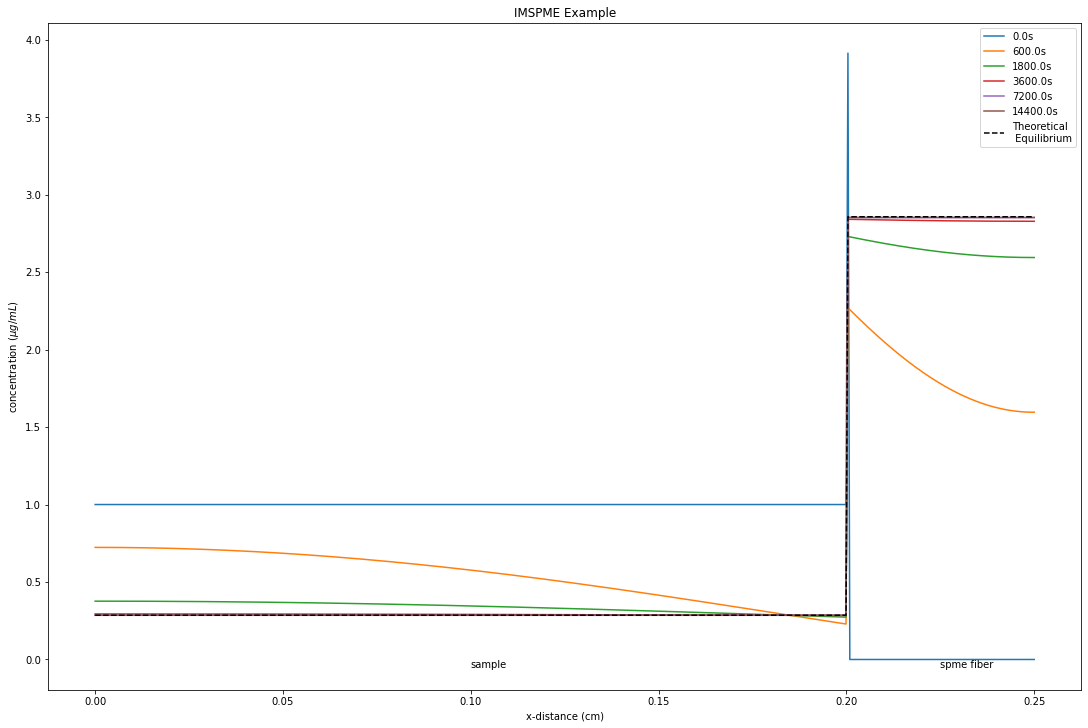

In [17]:
fig, axes = plt.subplots(1, 1, constrained_layout=True, figsize=(15,10))
plt.xlabel("x-distance (cm)")
plt.ylabel("concentration ($\mu g/mL$)")
plt.title("IMSPME Example")

for i, c in enumerate(concentrations):    
    #Plot
    t = iplot_time[i]
    axes.plot(p.x, c, label=str(t)+"s")
    
for i, name in enumerate(xnames):
    xlabel=0.5*p.xspace[i]+0.5*p.xspace[i+1]
    plt.text(xlabel, -0.05, name)
    
axes.plot(p.x, p.u_equi_ext, 'k--', label="Theoretical \n Equilibrium")
axes.legend()
plt.savefig(p.basename+"_final.png")